## Assessing Results

In [1]:
from __future__ import print_function
from data_assessment import *
%matplotlib inline

/home/ai2-jedi/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**Change all of these variables before running the code below to make sure you are working with the right class, image_range, and root**

In [17]:
image_range_exists = False  #Set to True if you are not the only one assessing images
image_range = "0-99"
class_name = "reinforcement"
root = "/media/ai2-jedi/data_disk/data_sets/drone_output_old/data_creation_output/reinforcement_from_S8/"

Run the following lines of code to set up the user interface.

*If you mess up the score for a picture, you can go back and change it by running the code after the user interface*

number: 10
3


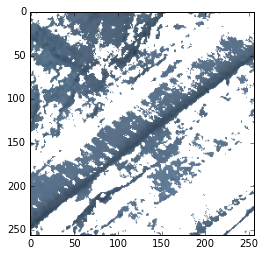

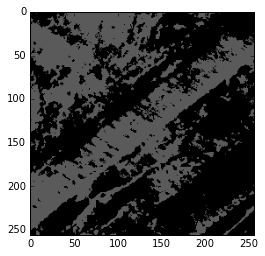

In [8]:
sol_ratings = []
number = 0
good = 0
end = False

if image_range_exists==True:
    image_links = os.listdir(root+"original_images_"+image_range)
else:
    image_links = os.listdir(root+"original_images")

try:
    if image_range_exists==True:
        im = "original_images_"+image_range+"/"+image_links[number]
        sh = "shapes_"+image_range+"/"+image_links[number]
    else:
        im = "original_images/"+image_links[number]
        sh = "shapes/"+image_links[number]
except:
    print("out of pictures")

buttons = ['Incorrect','Correct/Good','Swap','Label entire image']

if number==0:
    plt.imshow(cv2.cvtColor(cv2.imread(root+im), cv2.COLOR_BGR2RGB))
    fig = plt.figure()
    plt.imshow(cv2.cvtColor(cv2.imread(root+sh)*10, cv2.COLOR_BGR2RGB))
    item1 = widgets.RadioButtons(
        description='Solution Quality:',
        options= buttons,
    )
    item2 = widgets.Button(description='Submit')
    display(item1)
    display(item2)
    number += 1

def on_button_clicked(b):
    global item1
    global item2
    global root
    global im
    global sh
    global buttons
    global number
    global good
    global image_range
    global image_links
    
    try:
        if image_range_exists==True:
            im = "original_images_"+image_range+"/"+image_links[number]
            sh = "shapes_"+image_range+"/"+image_links[number]
        else:
            im = "original_images/"+image_links[number]
            sh = "shapes/"+image_links[number]
    except:
        print("out of pictures")
    clear_output(wait=True)
    print("number: "+str(number))
    if (item1.value in buttons[1:]):
        good+=1
        print(good)
    sol_ratings.append(item1.value)        
    plt.imshow(cv2.cvtColor(cv2.imread(root+im), cv2.COLOR_BGR2RGB))
    fig = plt.figure()
    plt.imshow(cv2.cvtColor(cv2.imread(root+sh)*10, cv2.COLOR_BGR2RGB))
    number += 1

item2.on_click(on_button_clicked)

In [10]:
#RUN THESE lines if you want to replace a score in the score list with the true score. If I am clicking several times in a 
#row and realize that the most recent image that I clicked, I assigned the wrong score to, I can change it using these lines.
#['Incorrect','Correct/Good','Swap','Label entire image']
true_score= "Correct/Good"

In [11]:
print(sol_ratings)
sol_ratings.pop()
sol_ratings.append(true_score)
print(sol_ratings)

['Incorrect', 'Incorrect', 'Incorrect', 'Incorrect', 'Incorrect', 'Incorrect', 'Incorrect', 'Label entire image', 'Correct/Good', 'Correct/Good']
['Incorrect', 'Incorrect', 'Incorrect', 'Incorrect', 'Incorrect', 'Incorrect', 'Incorrect', 'Label entire image', 'Correct/Good', 'Correct/Good']


In [12]:
sol_ratings

['Incorrect',
 'Incorrect',
 'Incorrect',
 'Incorrect',
 'Incorrect',
 'Incorrect',
 'Incorrect',
 'Label entire image',
 'Correct/Good',
 'Correct/Good']

You are now done running through all of the images, it is time to check that you have the correct number of good images, and save them

In [13]:
#Run these lines to check how many good solutions you have so far
good = 0
for i in sol_ratings:
    if (i in buttons[1:]):
        good +=1
print(good)

3


In [48]:
#Run these lines to save the good images to a new list
#['Incorrect','Correct/Good','Swap','Label entire image']
good_sol_links = []
good_sols = []
if image_range_exists== True:
    image_links = os.listdir(root+"original_images_"+image_range)
else:
    image_links = os.listdir(root+"original_images")
    
for i in xrange(len(sol_ratings)):
    if image_range_exists==True:
        im = "original_images_"+image_range+"/"+image_links[i]
        sh = "shapes_"+image_range+"/"+image_links[i]
    else:
        im = "original_images/"+image_links[i]
        sh = "shapes/"+image_links[i]
    
    if sol_ratings[i]==buttons[1]:
        existing_label = cv2.imread(root+sh)
        good_sol_links.append(image_links[i])
        good_sols.append(existing_label)

    if sol_ratings[i]==buttons[2]:
        existing_label = cv2.imread(root+sh)
        swapped_label = copy.copy(existing_label)
        swapped_label[existing_label==0]=labels_dict[class_name]
        swapped_label[existing_label!=0]=0
        good_sol_links.append(image_links[i])
        good_sols.append(swapped_label)
        
    if sol_ratings[i]==buttons[3]:
        existing_label = cv2.imread(root+sh)
        new_label = copy.copy(existing_label)
        new_label[new_label!=100]=labels_dict[class_name]
        good_sol_links.append(image_links[i])
        good_sols.append(new_label)

In [41]:
#Run this line to save the images (if this doesn't work, run the next set of lines)
new_folder = class_name+"_good_sol/"
if not os.path.exists("/media/ai2-jedi/data_disk/data_sets/drone_output_old/data_creation_output/"+new_folder):
    os.makedirs("/media/ai2-jedi/data_disk/data_sets/drone_output_old/data_creation_output/"+new_folder)
output_root = "/media/ai2-jedi/data_disk/data_sets/drone_output_old/data_creation_output/"+new_folder
new_shape_links = convert_images_v2(good_sols,good_sol_links,class_name,output_root)

Converted and Saved 0 images
Images are saved in /media/ai2-jedi/data_disk/data_sets/drone_output_old/data_creation_output/reinforcement_from_S8_good_sol_v7/


In [ ]:
# RUN THESE LINES ONLY IF THE PREVIOUS ONES DIDN"T WORK AND IT DIDN'T SAVE CORRECTLY

# new_folder = class_name+"_from_S8_"+str(num_images)+"_good_sol/"
# os.makedirs("/media/ai2-jedi/data_disk/data_sets/drone_output_old/data_creation_output/"+new_folder)
# output_root = "/media/ai2-jedi/data_disk/data_sets/drone_output_old/data_creation_output/"+new_folder
# new_shape_links = convert_images(colored_clusters_good_sol,sim_images_reinforcement_2_good_sol,class_name,output_root)

In [ ]:
# Run a few sample images to make sure that everything has run correctly

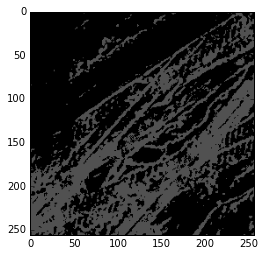

In [47]:
test_root = "/media/ai2-jedi/data_disk/data_sets/drone_output_old/data_creation_output/reinforcement_from_S8_good_sol_v6/"
plt.imshow(cv2.imread(test_root+"shapes/reinforcement_0.png")**2)